# Regression Trees

To investigate regession trees we will start with a familiar housing example.  Next, we move to investigate stock data acquired from Quandl.  There is a python module to handle calls to quandl, be sure to install with:

```
pip install quandl
```

We will discuss getting the API key later.  Now, let's run through a quick Regression tree on the California Housing dataset in scikitlearn.

In [1]:
#!pip install quandl

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
cali = fetch_california_housing()

In [3]:
X = cali.data
y = cali.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
tree = DecisionTreeRegressor(max_depth = 3)

In [5]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
pred = tree.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.788620544252656

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.7076134643997556

In [8]:
from sklearn.tree import export_graphviz

In [9]:
export_graphviz(tree, out_file = "tree.dot", feature_names=cali.feature_names)

In [10]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

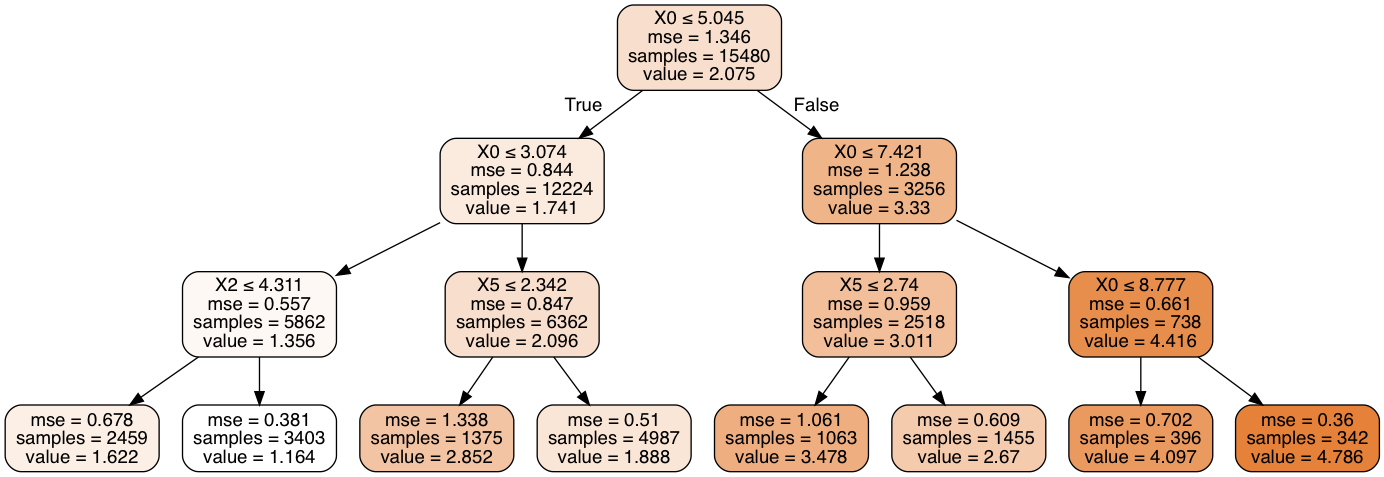

In [11]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

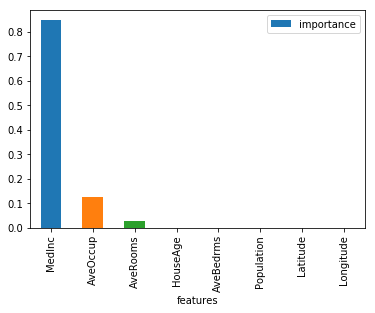

In [15]:
pd.DataFrame({'features': cali.feature_names, 'importance': tree.feature_importances_}).sort_values('importance', ascending = False).plot.bar('features', 'importance')

### The big idea is the same. let's go through each feature individually and look for a breaking point
#### From TreeRegressor to TreeClassifier you set the same hyperparameter
#### instead of between entropy and gini it uses Mean-sq-error

### Quandl Stock Data

To obtain your API key, please go to the Quandl documentation [here](https://docs.quandl.com/docs#section-authentication).  

![](images/quandl.png)

In [17]:
import quandl
quandl.ApiConfig.api_key = 'yqCMw5Mx38pEe9Us4m6x'

In [18]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2012-12-31', 'lte': '2018-07-31' }, 
                        paginate=True)
data.head()

#making a query for AAPL stock prices
#qopts is the search criteria

,ticker,date,adj_close
None,,,
0,AAPL,2012-12-31,69.009795
1,AAPL,2013-01-02,71.195748
2,AAPL,2013-01-03,70.296565
3,AAPL,2013-01-04,68.338996
4,AAPL,2013-01-07,67.937002


In [19]:
data.set_index('date', inplace=True)

In [20]:
data.pivot(columns = 'ticker').head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


Below are the parameters for queries to Quandl:

<table>
<thead>
<tr>
<th>Parameter</th>
<th>Required</th>
<th>Type</th>
<th>Values</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>database_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the database to which the dataset belongs.</td>
</tr>
<tr>
<td>dataset_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the dataset.</td>
</tr>
<tr>
<td>limit</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Use <code>limit=n</code> to get the first n rows of the dataset. Use <code>limit=1</code> to get just the latest row.</td>
</tr>
<tr>
<td>column_index</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Request a specific column. Column 0 is the date column and is always returned. Data begins at column 1.</td>
</tr>
<tr>
<td>start_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows on and after the specified start date.</td>
</tr>
<tr>
<td>end_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows up to and including the specified end date.</td>
</tr>
<tr>
<td>order</td>
<td>no</td>
<td>string</td>
<td>asc<br>desc</td>
<td>Return data in ascending or descending order of date. Default is <code>desc</code>.</td>
</tr>
<tr>
<td>collapse</td>
<td>no</td>
<td>string</td>
<td>none<br>daily<br>weekly<br>monthly<br>quarterly<br>annual</td>
<td>Change the sampling frequency of the returned data. Default is <code>none</code>; i.e., data is returned in its original granularity.</td>
</tr>
<tr>
<td>transform</td>
<td>no</td>
<td>string</td>
<td>none<br>diff<br>rdiff<br>rdiff_from<br>cumul<br>normalize</td>
<td>Perform elementary calculations on the data prior to downloading. Default is <code>none</code>. Calculation options are described below.</td>
</tr>
</tbody>
</table>

In [21]:
data["2016-01"].pivot(columns = 'ticker')

#what is returns is anything that contains year 2016 and month 1 (Jan)
#data [2016] would return anything from that year

,adj_close
ticker,AAPL
date,
2016-01-04,101.783763
2016-01-05,99.233131
2016-01-06,97.291172
2016-01-07,93.185040
2016-01-08,93.677776
2016-01-11,95.194629
2016-01-12,96.576222
2016-01-13,94.093220


In [22]:
data.loc["2016-01":"2016-02"].pivot(columns = 'ticker')

#if you want a range of dates pass it as a list index

,adj_close
ticker,AAPL
date,
2016-01-04,101.783763
2016-01-05,99.233131
2016-01-06,97.291172
2016-01-07,93.185040
2016-01-08,93.677776
2016-01-11,95.194629
2016-01-12,96.576222
2016-01-13,94.093220


In [23]:
stocks = data.pivot(columns = 'ticker')

In [24]:
stocks.head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


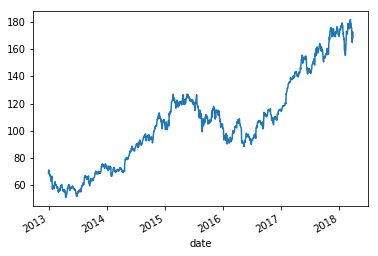

In [25]:
stocks.plot(legend=False)

In [137]:
stocks.iloc[0]

           ticker
adj_close  AAPL      69.009795
Name: 2012-12-31 00:00:00, dtype: float64

In [138]:
stocks.iloc[-1]
#most recent/last price 

           ticker
adj_close  AAPL      168.34
Name: 2018-03-27 00:00:00, dtype: float64

In [139]:
stocks.iloc[-1] - stocks.iloc[0]

#difference of those two entries is total change over that time period

           ticker
adj_close  AAPL      99.330205
dtype: float64

### Read this article!

In [26]:
#for more on multiple indicies resulting from pivot tables, see
#https://pandas.pydata.org/pandas-docs/version/0.22/reshaping.html
stocks = stocks['adj_close']

In [27]:
stocks.columns

Index(['AAPL'], dtype='object', name='ticker')

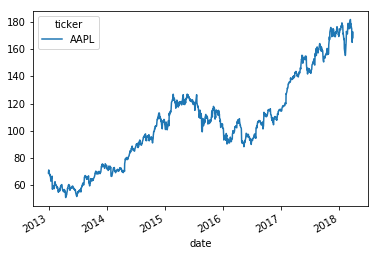

In [28]:
stocks.plot()

In [32]:
stocks.diff().head()

#diff finds consecutive difference of rows
#call diff method on rows

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,2.185953
2013-01-03,-0.899183
2013-01-04,-1.957569
2013-01-07,-0.401994


In [33]:
diffs = stocks.diff()

### Goal



In [34]:
daily_rtn = stocks.diff()/stocks * 100

In [35]:
daily_rtn[:5]

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,3.070342
2013-01-03,-1.279128
2013-01-04,-2.864497
2013-01-07,-0.591716


In [147]:
stocks.head(), diffs.head()

(ticker           AAPL
 date                 
 2012-12-31  69.009795
 2013-01-02  71.195748
 2013-01-03  70.296565
 2013-01-04  68.338996
 2013-01-07  67.937002, ticker          AAPL
 date                
 2012-12-31       NaN
 2013-01-02  2.185953
 2013-01-03 -0.899183
 2013-01-04 -1.957569
 2013-01-07 -0.401994)

In [148]:
2/69 * 100

2.898550724637681

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2012-12-31 to 2018-03-27
Data columns (total 22 columns):
ticker           1317 non-null object
adj_close        1317 non-null float64
close_minus1     1317 non-null float64
close_minus2     1317 non-null float64
close_minus3     1317 non-null float64
close_minus4     1317 non-null float64
close_minus5     1317 non-null float64
close_minus6     1317 non-null float64
close_minus7     1317 non-null float64
close_minus8     1317 non-null float64
close_minus9     1317 non-null float64
close_minus10    1317 non-null float64
close_minus11    1317 non-null float64
close_minus12    1317 non-null float64
close_minus13    1317 non-null float64
close_minus14    1317 non-null float64
close_minus15    1317 non-null float64
close_minus16    1317 non-null float64
close_minus17    1317 non-null float64
close_minus18    1317 non-null float64
close_minus19    1317 non-null float64
close_minus20    1317 non-null float64
dtypes: float64(21

In [36]:
for i in range(1, 21, 1):
    data.loc[:, 'close_minus' + str(i)] = data['adj_close']
    data20 = data[[x for x in data.columns if 'close_minus' in x or x == 'adj_close']].iloc[20:,]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2012-12-31 to 2018-03-27
Data columns (total 22 columns):
ticker           1317 non-null object
adj_close        1317 non-null float64
close_minus1     1317 non-null float64
close_minus2     1317 non-null float64
close_minus3     1317 non-null float64
close_minus4     1317 non-null float64
close_minus5     1317 non-null float64
close_minus6     1317 non-null float64
close_minus7     1317 non-null float64
close_minus8     1317 non-null float64
close_minus9     1317 non-null float64
close_minus10    1317 non-null float64
close_minus11    1317 non-null float64
close_minus12    1317 non-null float64
close_minus13    1317 non-null float64
close_minus14    1317 non-null float64
close_minus15    1317 non-null float64
close_minus16    1317 non-null float64
close_minus17    1317 non-null float64
close_minus18    1317 non-null float64
close_minus19    1317 non-null float64
close_minus20    1317 non-null float64
dtypes: float64(21

In [38]:
data.head()

,ticker,adj_close,close_minus1,close_minus2,close_minus3,close_minus4,close_minus5,close_minus6,close_minus7,close_minus8,...,close_minus11,close_minus12,close_minus13,close_minus14,close_minus15,close_minus16,close_minus17,close_minus18,close_minus19,close_minus20
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,AAPL,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,...,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795
2013-01-02,AAPL,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,...,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748
2013-01-03,AAPL,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,...,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565
2013-01-04,AAPL,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,...,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996
2013-01-07,AAPL,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,...,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002


In [55]:
sp20 = data.iloc[:, ::-1]

In [56]:
sp20.head()

,close_minus20,close_minus19,close_minus18,close_minus17,close_minus16,close_minus15,close_minus14,close_minus13,close_minus12,close_minus11,...,close_minus8,close_minus7,close_minus6,close_minus5,close_minus4,close_minus3,close_minus2,close_minus1,adj_close,ticker
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,...,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,AAPL
2013-01-02,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,...,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,AAPL
2013-01-03,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,...,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,AAPL
2013-01-04,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,...,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,AAPL
2013-01-07,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,...,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,AAPL


In [57]:
sp20.shape

(1317, 22)

In [77]:
sp20.isnull().sum()

close_minus20    0
close_minus19    0
close_minus18    0
close_minus17    0
close_minus16    0
close_minus15    0
close_minus14    0
close_minus13    0
close_minus12    0
close_minus11    0
close_minus10    0
close_minus9     0
close_minus8     0
close_minus7     0
close_minus6     0
close_minus5     0
close_minus4     0
close_minus3     0
close_minus2     0
close_minus1     0
adj_close        0
ticker           0
dtype: int64

In [74]:
sp20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2012-12-31 to 2018-03-27
Data columns (total 22 columns):
close_minus20    1317 non-null float64
close_minus19    1317 non-null float64
close_minus18    1317 non-null float64
close_minus17    1317 non-null float64
close_minus16    1317 non-null float64
close_minus15    1317 non-null float64
close_minus14    1317 non-null float64
close_minus13    1317 non-null float64
close_minus12    1317 non-null float64
close_minus11    1317 non-null float64
close_minus10    1317 non-null float64
close_minus9     1317 non-null float64
close_minus8     1317 non-null float64
close_minus7     1317 non-null float64
close_minus6     1317 non-null float64
close_minus5     1317 non-null float64
close_minus4     1317 non-null float64
close_minus3     1317 non-null float64
close_minus2     1317 non-null float64
close_minus1     1317 non-null float64
adj_close        1317 non-null float64
ticker           1317 non-null object
dtypes: float64(21

In [70]:
X_train = sp20[:-1300].drop(['ticker','adj_close'],axis=1)
X_test = sp20[-1300:].drop(['ticker','adj_close'],axis=1)
y_train = sp20['adj_close'].shift(-1)[:-1300]
y_test = sp20['adj_close'].shift(-1)[-1300:]

#Splitting train and test day manually so train and test data is not a random mixture of data points because this is
#occuring over a period of time

### Problem

Train and examine the performance of a `DecisionTreeRegressor` and `LinearRegression` model here.  Which does better?  Visualize your results.

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)


In [84]:
tree = DecisionTreeRegressor(max_depth =5)

In [85]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

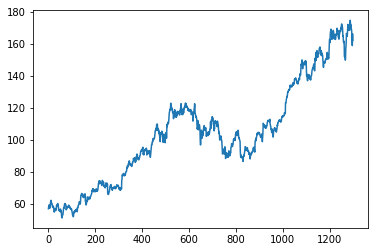

In [86]:
plt.plot(pred, label='linear')